## Author : Sriram Ananthula

The objective of this assignment is to demonstrate the working of Linear Regression algorithm in Machine Learning using pre-built python library sklearn. The same can be verified using generation of a simple best fit line in Excel notebook.

### Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

### Importing and visualizing the Data set

In [2]:
df = pd.read_csv("Regression-Data.txt",header=0)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


As there is only a single feature influencing the score, we can visualize the dependancy of target variable "Score" on "Hours/day" using a scatter plot clearly.

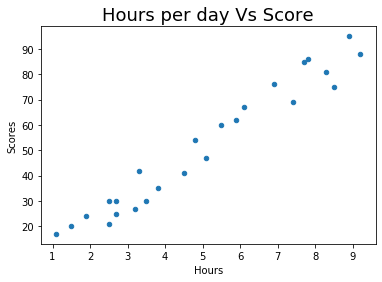

In [3]:
df.plot(kind='scatter', x = 'Hours', y='Scores')
plt.title('Hours per day Vs Score', fontsize = 18)
plt.show()

### Model Building

In [4]:
df_features = df.Hours
df_target = df.Scores

# 80% of the data points are used to train the model and 20% is used as test set

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=10)

In [5]:
LR = LinearRegression()
model = LR.fit(np.array(X_train).reshape(-1,1), y_train)

In [6]:
# For a Linear regression model in scikit learn, the feature data is to be an n-darray. 
# Hence we need to reshape the data before training the model

y_pred = model.predict(np.array(X_test).reshape(-1,1))

In [7]:
final_df = df.copy(deep = 'True')
final_df['Predicted_Score'] = model.predict(np.array(df.Hours).reshape(-1,1))
final_df.head()

,Hours,Scores,Predicted_Score
0,2.5,21,27.185729
1,5.1,47,52.702923
2,3.2,27,34.055743
3,8.5,75,86.071561
4,3.5,30,37.000034


### Model Evaluation

Here, 3 different metrics are used to evaluate the model performance. RMSE metric is preferred over the MAE as the predictions far from the actual values are peanalized. In both the cases, the objective is to minimize the MAE/RMSE of the model.

In [8]:
RMSE = sqrt(mean_squared_error(y_test,y_pred))
R2 = model.score(np.array(X_test).reshape(-1,1), y_test)
MAE = mean_absolute_error(y_test, y_pred)

print("R-squared for the model is {}" .format(round(R2,3)))
print("RMSE error for the model is {}" .format(round(RMSE,3)))
print('Mean Absolute Error for the model is {}'.format(round(MAE,3))) 

R-squared for the model is 0.668
RMSE error for the model is 5.857
Mean Absolute Error for the model is 5.633


In [9]:
test_hours = 9.25

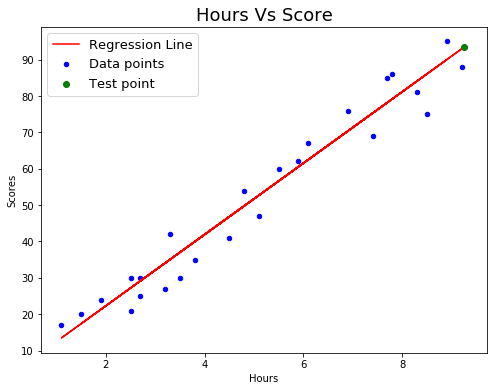

In [10]:
# Plotting the given data points 
df.plot(kind='scatter', x = 'Hours', y='Scores', color = 'b', label = 'Data points', figsize=(8,6))

# Plotting the regression line obtained by training
plt.plot(df_features, model.predict(np.array(df_features).reshape(-1,1)), color = 'r', label = "Regression Line")

# Plotting the test point, whose prediction is to be made by the trained model
plt.scatter(test_hours, model.predict(np.array(test_hours).reshape(-1,1)), color='g', label = 'Test point')

plt.title('Hours Vs Score', fontsize = 18)
plt.legend(loc = 'upper left', fontsize = 13)
plt.show()